## Viz 1: McDonalds Calorie Breakdown by Category
This notebook uses Bokeh to replicate many of the basic functionalities that one would expect from an interactive visualization software such as Tableau. Some of the features are noted below
* Basic Hover Tool Functionality
* Uses Notebook Widget to update data source
* Dynamic reference line
* Stacked bar graph using Plot Elements

In [1]:
import pandas as pd
from ipywidgets import interact
from bokeh.io import show, output_notebook, push_notebook
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.plotting import figure
output_notebook()

def subset(df, category):
    df1 = df[df['Category'] == category].copy()
    df1 = df1.sort_values('Calories', ascending=False).reset_index(drop=True).reset_index()
    df1['mean'] = df1['Calories'].mean()
    return ColumnDataSource(df1)

def update(Category):
    df2 = subset(test, Category)
    source.data.update(df2.data)
    push_notebook()

mcd = pd.read_csv('menu.csv')

df = mcd[['Category', 'Item', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars', 'Cholesterol']]
test = df.copy()
test['Calories'] = test['Total Fat']*9.0 + test['Carbohydrates']*4.0 + test['Protein']*4.0
test['h1'] = test['Protein']*4.0
test['h2'] = test['Protein']*4.0 + test['Total Fat']*9.0
test['h3'] = test['Protein']*4.0 + test['Total Fat']*9.0 + test['Carbohydrates']*4.0

df1 = test[test['Category'] == 'Breakfast']
df1 = df1.sort_values('Calories', ascending = False).reset_index(drop=True).reset_index()
df1['mean'] = df1['Calories'].mean()

source = ColumnDataSource(df1)
TOOLS = "pan, wheel_zoom, reset, save"
hover = HoverTool(names = ['cals'], tooltips=[
            ("Name", "@Item"),
            ("Calories", "@Calories"),
            ("Fat(g)", "@{Total Fat}"),
            ("Carbohydrates(g)", "@Carbohydrates"),
            ("Protein(g)", "@Protein")
        ])

hover2 = HoverTool(names = ['mean'], tooltips=[("Mean", "@mean"),])

p = figure(title="McDonalds Nutrition Info", tools=TOOLS)
p.add_tools(hover)
p.add_tools(hover2)

p.vbar(name='cals', x='index',  width=.8, bottom=0, top='h1',
       color='orange', legend='Protein Calories (kcal)', source=source,
       hover_fill_color='blue', hover_alpha=.3)
p.vbar(name='cals', x='index',  width=.8, bottom='h1', top='h2',
       color='gold', legend='Fat Calories (kcal)', source=source,
       hover_fill_color='blue', hover_alpha=.3)
p.vbar(name='cals', x='index',  width=.8, bottom='h2', top='h3',
       color='brown', legend='Carbs Calories (kcal)', source=source,
       hover_fill_color='blue', hover_alpha=.3)

p.line(name='mean', x='index', y='mean', source=source, line_dash='dashed', legend='Category Mean')

p.legend.location = 'top_right'
p.grid.grid_line_color = None
p.yaxis.axis_label = 'Calories'
p.xaxis.visible = False
p.x_range.start = .5
p.y_range.start = .5

show(p, notebook_handle = True)

Loading BokehJS ...

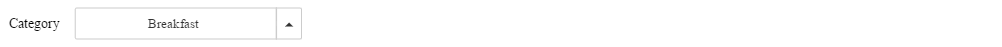

In [2]:
interact(update, Category = mcd['Category'].unique().tolist())